<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#&quot;Methinks-it-is-like-a-weasel&quot;" data-toc-modified-id="&quot;Methinks-it-is-like-a-weasel&quot;-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>"Methinks it is like a weasel"</a></span><ul class="toc-item"><li><span><a href="#Representing-and-initialising-individuals" data-toc-modified-id="Representing-and-initialising-individuals-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Representing and initialising individuals</a></span></li><li><span><a href="#Evaluating-individuals" data-toc-modified-id="Evaluating-individuals-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Evaluating individuals</a></span></li><li><span><a href="#Mutation" data-toc-modified-id="Mutation-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Mutation</a></span></li><li><span><a href="#A-mutation-hill-climber" data-toc-modified-id="A-mutation-hill-climber-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>A mutation hill-climber</a></span></li><li><span><a href="#A-GA-without-crossover" data-toc-modified-id="A-GA-without-crossover-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>A GA without crossover</a></span></li><li><span><a href="#Crossover" data-toc-modified-id="Crossover-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Crossover</a></span></li><li><span><a href="#A-GA-with-crossover" data-toc-modified-id="A-GA-with-crossover-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>A GA with crossover</a></span></li></ul></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Evaluation</a></span><ul class="toc-item"><li><span><a href="#Checking-if-Hypothesis-is-correct" data-toc-modified-id="Checking-if-Hypothesis-is-correct-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Checking if Hypothesis is correct</a></span></li><li><span><a href="#Using-small-population-(<500)" data-toc-modified-id="Using-small-population-(<500)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Using small population (&lt;500)</a></span></li><li><span><a href="#Using-more-difficult-problem-(>28-characters-long-objective)-with-same-population-(500)" data-toc-modified-id="Using-more-difficult-problem-(>28-characters-long-objective)-with-same-population-(500)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Using more difficult problem (&gt;28 characters long objective) with same population (500)</a></span></li><li><span><a href="#Higher-mutation-rate" data-toc-modified-id="Higher-mutation-rate-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Higher mutation rate</a></span></li><li><span><a href="#Comparing-GA-No-Cross-and-GA-Cross-best-mutation-rates-(speed-comparison-with-hill-climber)" data-toc-modified-id="Comparing-GA-No-Cross-and-GA-Cross-best-mutation-rates-(speed-comparison-with-hill-climber)-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Comparing GA No Cross and GA Cross best mutation rates (speed comparison with hill climber)</a></span></li></ul></li></ul></div>

# Evolution of Complexity

## "Methinks it is like a weasel"

What effect does crossover have
on the rate of evolution?

In [1]:
import string
import random
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

### Representing and initialising individuals 

In [2]:
def gen_pop(size=10, obj_len = 28):
    population = []
    for j in range(0, size):
        individual = []
        for i in range(0, obj_len):
            individual.append(
                random.choice(string.ascii_letters[:26] + ' '))
        individual = ''.join(map(str,individual))
        population.append(individual)
    
    return population

### Evaluating individuals 

In [3]:
def gen_fit(population, objective):
    fitness = []
    fl = False
    for k in range(0, len(population)):
        counter = 0
        for i, j in zip(objective, population[k]):
            counter += 1 if i == j else 0
        if counter == len(objective):
            print("\nMatching String!")
            fitness.append(counter)
            fl = True
        else:
            fitness.append(counter)

    d = dict(zip(population, fitness)) 
    #{'Element': population, 'Fitness': fitness}
    return fitness, d

### Mutation

In [4]:
def mutation(population):
    population = list(population)
    #population = ''.join(population)
    for k in range(0, len(population)):
        population[k] = list(population[k])
        for j, i in enumerate(population[k]):
            population[k][j] = (np.random.choice([i, 
                        random.choice(string.ascii_letters[:26] + ' ')], 
                        p=[27/28, 1/28]))
        population[k] = ''.join(population[k])
    return population
        
#mutation(['ehhsad', 'dasd'])

In [5]:
def vary_mutation(population, rate):
    antirate = len(population) - rate
    population = list(population)
    #population = ''.join(population)
    #print(antirate, len(population), rate, len(population))
    for k in range(0, len(population)):
        population[k] = list(population[k])
        for j, i in enumerate(population[k]):
            population[k][j] = (np.random.choice([i, 
                        random.choice(string.ascii_letters[:26] + ' ')], 
                        p=[antirate/len(population), rate/len(population)]))
        population[k] = ''.join(population[k])
    return population

#vary_mutation('methinks it is like a weasel', 1)

### A mutation hill-climber

In [6]:
time_list = []
for i in range(0, 5):
    start = time.time()
    objective = 'methinks it is like a weasel'
    population = gen_pop(1, obj_len= len(objective))
    fitness, df = gen_fit(population, objective)
    while max(fitness) < len(objective):
        df2 = mutation([*df])
        fitness2, df2 = gen_fit(df2, objective)
        if max(fitness2)> max(fitness):
            df = df2
            fitness = fitness2

    end = time.time()
    time_list.append(end - start)
    print("Execution Time:", end - start)
    print(df)


Matching String!
Execution Time: 4.697423219680786
{'methinks it is like a weasel': 28}

Matching String!
Execution Time: 2.6334731578826904
{'methinks it is like a weasel': 28}

Matching String!
Execution Time: 5.2706522941589355
{'methinks it is like a weasel': 28}

Matching String!
Execution Time: 3.246314764022827
{'methinks it is like a weasel': 28}

Matching String!
Execution Time: 6.305612802505493
{'methinks it is like a weasel': 28}


### A GA without crossover

In [18]:
def ga_no_cross(pop_num, objective, rate, iter_num):
    time_list2 = []
    fitness_list = []
    for i in range(0, iter_num):
        start = time.time()
        population = gen_pop(pop_num, obj_len= len(objective))
        fitness, df = gen_fit(population, objective)
        eval_list = []
        eval_count = 1
        while max(fitness) < len(objective):
            tournment = random.sample(set(population), 2)
            fitness2, df2 = gen_fit(tournment, objective)
            if fitness2[0] > fitness2[1]:
                parent1 = tournment[0] 
            else:
                parent1 = tournment[1]
            if (tournment[0] and tournment[1]) in eval_list:
                eval_count += 0
            else:
                eval_count += 1
                eval_list.extend(tournment)
            child = ''.join(vary_mutation(parent1, rate))
            a, b = random.sample(range(0, pop_num-1), 2) 
            tournment2 = [population[a], population[b]]
            fitness3, df3 = gen_fit(tournment2, objective)
            if fitness3[0] > fitness3[1]:
                population[b] = child 
            else:
                population[a] = child
            fitness, df = gen_fit(population, objective)

        end = time.time()
        time_list2.append(end - start)
        print("Execution Time:", end - start)
        df_sort = sorted(df, key=df.get, reverse=True)
        for name in df_sort[:5]:
            print(name, df[name])
        fitness_list.append(eval_count)
        print("Fitness Evaluation: ", eval_count)
        
    return time_list2, fitness_list

### Crossover

In [8]:
# Uniform crossover
def crossover(p1, p2):
    child = []
    for i in range(0, len(p1)):
        child.append(np.random.choice([p1[i], p2[i]], p=[1/2, 1/2]))
    return child

# crossover('ciao', 'byee')

### A GA with crossover

In [19]:
def ga_cross(pop_num, objective, rate, iter_num):
    time_list3 = []
    fitness_list2 = []
    for i in range(0, iter_num):
        start = time.time()
        population = gen_pop(pop_num, obj_len= len(objective))
        fitness, df = gen_fit(population, objective)
        eval_list = []
        eval_count = 1
        while max(fitness) < len(objective):
            tournment = random.sample(set(population), 2)
            fitness2, df2 = gen_fit(tournment, objective)
            if fitness2[0] > fitness2[1]:
                parent1 = tournment[0] 
            else:
                parent1 = tournment[1]
            if (tournment[0] and tournment[1]) in eval_list:
                eval_count += 0
            else:
                eval_count += 1
                eval_list.extend(tournment)
            tournment2 = random.sample(set(population), 2)
            fitness3, df3 = gen_fit(tournment2, objective)
            if fitness3[0] > fitness3[1]:
                parent2 = tournment2[0] 
            else:
                parent2 = tournment2[1]
            if (tournment2[0] and tournment2[1]) in eval_list:
                eval_count += 0
            else:
                eval_count += 1
                eval_list.extend(tournment)

            cross_child = crossover(parent1, parent2)
            child = ''.join(vary_mutation(cross_child, rate))
            a, b = random.sample(range(0, pop_num-1), 2) 
            tournment3 = [population[a], population[b]]
            fitness4, df4 = gen_fit(tournment3, objective)
            if fitness4[0] > fitness4[1]:
                population[b] = child 
            else:
                population[a] = child
            fitness, df = gen_fit(population, objective)

        end = time.time()
        time_list3.append(end - start)
        print("Execution Time:", end - start)
        df_sort = sorted(df, key=df.get, reverse=True)
        for name in df_sort[:5]:
            print(name, df[name])
        fitness_list2.append(eval_count)
        print("Fitness Evaluation: ", eval_count)
        
    return time_list3, fitness_list2

## Evaluation

So, is the hypothesis correct? Is it true that a genetic algorithm with crossover finds solutions to a simple optimisation problem faster when using crossover than without crossover?

-  If you use a small population is the result the same? Explain.
-  In this problem any simple optimisation method like these will always find the optimum solution sooner or later. If the problem was a more difficult optimisation problem, do you think the answer to the hypothesis would be the same? Explain.

Further questions for those that find the assignment so far to be easy:

- Does using a higher mutation rate affect the result? Why?
- Try a range of mutation rates for the mutation-only GA, and a range of mutation rates for the GA with crossover. Does the best mutation rate for the mutation-only GA work faster than the best mutation rate for the GA with crossover?
-  How does the best of the best of the GAs compare to the speed of the mutation hill-climber? 

### Checking if Hypothesis is correct 

In [10]:
time_list2, fitness_list = ga_no_cross(pop_num = 500, objective = 'methinks it is like a weasel', rate = 1, iter_num = 5)


Matching String!
Execution Time: 331.8205659389496
methinks it is like a weasel 28
methinks mt is like a weasel 27
methinks it is like a weasxl 27
methinks it is l ke a weasel 27
methinks it is like a weas l 27
Fitness Evaluation:  28624

Matching String!
Execution Time: 231.57503485679626
methinks it is like a weasel 28
methings it is like a weasel 27
methinns it is like a weasel 27
methinks it ws like a weasel 27
methinss it is like a weasec 26
Fitness Evaluation:  21992

Matching String!
Execution Time: 269.36884331703186
methinks it is like a weasel 28
tethinks it is like a weasel 27
methinks ht is like a weasel 27
methinks it is like a weaael 27
methinks it is likeka weasel 27
Fitness Evaluation:  25319

Matching String!
Execution Time: 374.29137444496155
methinks it is like a weasel 28
methinks ittis like a weasel 27
methinks itvis like a weasel 27
methinkscit is like a weasel 27
methinks itnis like a weasel 27
Fitness Evaluation:  33089

Matching String!
Execution Time: 341.957

In [11]:
time_list3, fitness_list2 = ga_cross(pop_num = 500, objective = 'methinks it is like a weasel', rate = 1, iter_num = 5)


Matching String!
Execution Time: 22.610027313232422
methinks it is like a weasel 28
methinks it is like apweasel 27
methinks it is like a weusel 27
methinks it is vike a weasel 27
methinks it is like atweasel 27
Fitness Evaluation:  5250

Matching String!
Execution Time: 24.910786390304565
methinks it is like a weasel 28
methinks it is like apweasel 27
methinks itiis like a weasel 27
methinks itdis like a weasel 27
methinks itnis like a weasel 27
Fitness Evaluation:  5880

Matching String!
Execution Time: 23.02961802482605
methinks it is like a weasel 28
methinks it is likd a weasel 27
methinkf it is like a weasel 27
methinkm it is like a weasel 27
methinkj it is like a weasel 27
Fitness Evaluation:  5328

Matching String!
Execution Time: 21.983933448791504
methinks it is like a weasel 28
methinks itmis like a weasel 27
methinks it is jike a weasel 27
methinks it is likeia weasel 27
methinks itkis like a weasel 27
Fitness Evaluation:  5597

Matching String!
Execution Time: 22.31965517

In [12]:
time_list = [x/60 for x in time_list]
time_list2 = [x/60 for x in time_list2]
time_list3 = [x/60 for x in time_list3]
print("Hill Climber Execution Time Mean and Variance", np.mean(time_list), np.var(time_list))
print("GA Without Crossover Execution Time Mean and Variance", np.mean(time_list2), np.var(time_list2))
print("GA With Crossover Execution Time Mean and Variance", np.mean(time_list3), np.var(time_list3))

Hill Climber Execution Time Mean and Variance 0.07384492079416911 0.0004958195476940824
GA Without Crossover Execution Time Mean and Variance 5.163377497196198 0.7462203673448797
GA With Crossover Execution Time Mean and Variance 0.38284673452377316 0.00029416993625457706


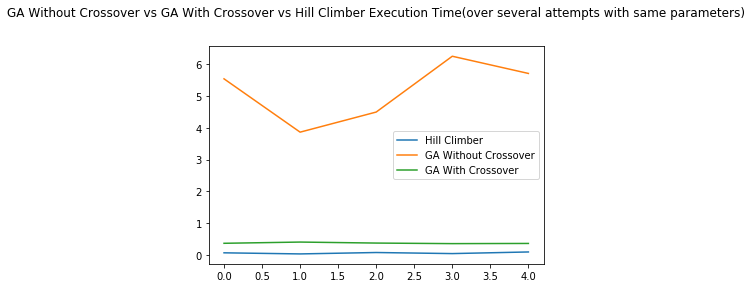

In [13]:
plt.title("GA Without Crossover vs GA With Crossover vs Hill Climber Execution Time"+ 
          "(over several attempts with same parameters)", pad = 30)
plt.plot(time_list, label='Hill Climber')
plt.plot(time_list2, label='GA Without Crossover')
plt.plot(time_list3, label='GA With Crossover')
plt.legend()
plt.show()

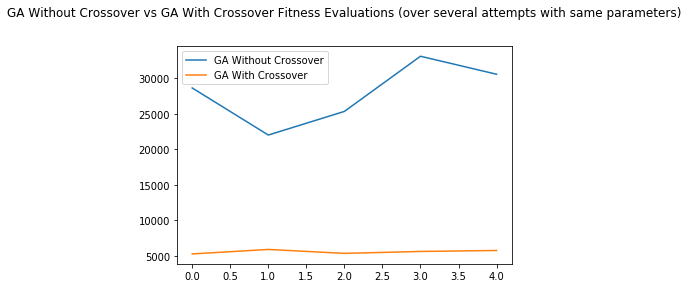

In [14]:
plt.title("GA Without Crossover vs GA With Crossover Fitness Evaluations (over several attempts with same parameters)", 
          pad = 30)
plt.plot(fitness_list, label='GA Without Crossover')
plt.plot(fitness_list2, label='GA With Crossover')
plt.legend()
plt.show()

### Using small population (<500)

In [20]:
time_list2, fitness_list = ga_no_cross(pop_num = 50, objective = 'methinks it is like a weasel', rate = 1, iter_num = 5)


Matching String!
Execution Time: 21.36419153213501
methinks it is like a weasel 28
methinks xt is like a weasel 27
methinks itnis like a weasel 27
methinks ut is like a weasel 27
methinks rt is like a weasel 27
Fitness Evaluation:  6550

Matching String!
Execution Time: 23.083027839660645
methinks it is like a weasel 28
meqhinks it is like a weasel 27
methinks it is like a weaseh 27
melhinks it is like a weasel 27
methinks it is like a weaseo 27
Fitness Evaluation:  7147

Matching String!
Execution Time: 23.26683282852173
methinks it is like a weasel 28
dethinks it is like a weasel 27
methinks it ia like a weasel 27
 ethinks it is like a weasel 27
aethinks it is like a weasel 27
Fitness Evaluation:  6660

Matching String!
Execution Time: 23.83762240409851
methinks it is like a weasel 28
methinks itnis like a weasel 27
methknks it is like a weasel 27
mpthinks it is like a weasel 27
methinks it is like arweasel 27
Fitness Evaluation:  6880

Matching String!
Execution Time: 11.4766497611

In [21]:
time_list3, fitness_list2 = ga_cross(pop_num = 50, objective = 'methinks it is like a weasel', rate = 1, iter_num = 5)


Matching String!
Execution Time: 4.2981181144714355
methinks it is like a weasel 28
methinks it is like a peasel 27
methinks it is like a  easel 27
methinks it is life a weasel 27
methinks it is like a keasel 27
Fitness Evaluation:  1968

Matching String!
Execution Time: 7.138648986816406
methinks it is like a weasel 28
methinks tt is like a weasel 27
methinks at is like a weasel 27
methinks ht is like a weasel 27
methinks it os like a weasel 27
Fitness Evaluation:  3099

Matching String!
Execution Time: 10.593117952346802
methinks it is like a weasel 28
methinks it isplike a weasel 27
methinks it isqlike a weasel 27
methinks it iswlike a weasel 27
methinks it isrlike a weasel 27
Fitness Evaluation:  4256

Matching String!
Execution Time: 4.905454874038696
methinks it is like a weasel 28
metbinks it is like a wbasel 26
metlinks it is like a wuasel 26
metbinks it is like a wvasel 26
metbinks it is like a wuasel 26
Fitness Evaluation:  2247

Matching String!
Execution Time: 13.551723003

In [22]:
time_list = [x/60 for x in time_list]
time_list2 = [x/60 for x in time_list2]
time_list3 = [x/60 for x in time_list3]
print("Hill Climber Execution Time Mean and Variance", np.mean(time_list), np.var(time_list))
print("GA Without Crossover Execution Time Mean and Variance", np.mean(time_list2), np.var(time_list2))
print("GA With Crossover Execution Time Mean and Variance", np.mean(time_list3), np.var(time_list3))

Hill Climber Execution Time Mean and Variance 0.0012307486799028185 1.3772765213724508e-07
GA Without Crossover Execution Time Mean and Variance 0.34342774788538616 0.00597660951349966
GA With Crossover Execution Time Mean and Variance 0.13495687643686932 0.0034178059755716516


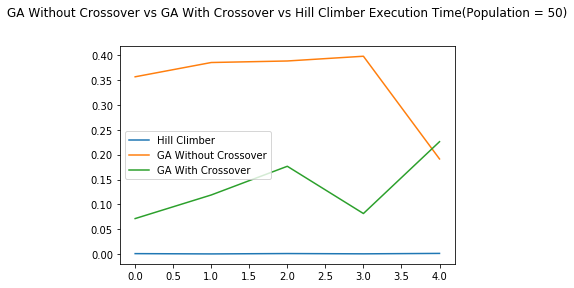

In [23]:
plt.title("GA Without Crossover vs GA With Crossover vs Hill Climber Execution Time"+ 
          "(Population = 50)", pad = 30)
plt.plot(time_list, label='Hill Climber')
plt.plot(time_list2, label='GA Without Crossover')
plt.plot(time_list3, label='GA With Crossover')
plt.legend()
plt.show()

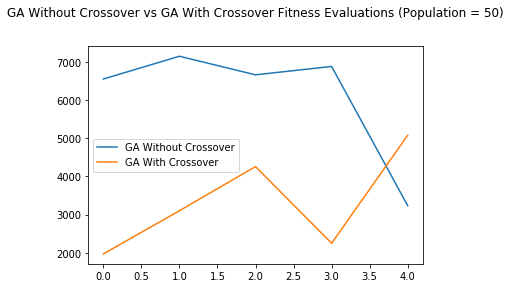

In [24]:
plt.title("GA Without Crossover vs GA With Crossover Fitness Evaluations (Population = 50)", 
          pad = 30)
plt.plot(fitness_list, label='GA Without Crossover')
plt.plot(fitness_list2, label='GA With Crossover')
plt.legend()
plt.show()

### Using more difficult problem (>28 characters long objective) with same population (500)

In [25]:
time_list2, fitness_list = ga_no_cross(pop_num = 500, objective = 'methinks it is like a weasel flying in the sky', 
                                       rate = 1, iter_num = 5)


Matching String!
Execution Time: 999.7886357307434
methinks it is like a weasel flying in the sky 46
methinks it is like a weasel ylying in the sky 45
methinks it is like a weasel zlying in the sky 45
methinks it is like a weasel vlying in the sky 45
meehinks it is like a weasel flying in the sky 45
Fitness Evaluation:  46287

Matching String!
Execution Time: 1057.8743703365326
methinks it is like a weasel flying in the sky 46
methinks it isllike a weasel flying in the sky 45
methinks it is like a weasel flying in thd sky 45
methznks it is like a weasel flying in the sky 45
methinks it is like a weasel flying in the yky 45
Fitness Evaluation:  51405

Matching String!
Execution Time: 721.8170289993286
methinks it is like a weasel flying in the sky 46
methincs it is like a weasel flying in the sky 45
methiegs it is like a weasel flying in the sky 44
methiths it is like a weasel flying in the sky 44
methiels it is like a weasel flying in the sky 44
Fitness Evaluation:  37922

Matching St

In [26]:
time_list3, fitness_list2 = ga_cross(pop_num = 500, objective = 'methinks it is like a weasel flying in the sky', 
                                     rate = 1, iter_num = 5)


Matching String!
Execution Time: 62.64556646347046
methinks it is like a weasel flying in the sky 46
methinks it is like a weasel flying in tha sky 45
m thinks it is like a weasel flying in the sky 45
methinks it is like a weasel fiying in the sky 45
methinks it is like a weasel flzing in the sky 45
Fitness Evaluation:  7222

Matching String!
Execution Time: 64.94908428192139
methinks it is like a weasel flying in the sky 46
methinds it is like a weasel flying in the sky 45
methinks it is like a weasel flying in thr sky 45
methinks it is like a weasel flying hn the sky 45
methinks it is lice a weasel flying in the sky 45
Fitness Evaluation:  7907

Matching String!
Execution Time: 66.45039963722229
methinks it is like a weasel flying in the sky 46
methinks it is like a wepsel flying in the sky 45
methinks it is like a weasel flying in jhe sky 45
methinks it is like a wensel flying in the sky 45
methinks it is like a weasel flying in ihe sky 45
Fitness Evaluation:  8087

Matching String

In [27]:
time_list = [x/60 for x in time_list]
time_list2 = [x/60 for x in time_list2]
time_list3 = [x/60 for x in time_list3]
print("Hill Climber Execution Time Mean and Variance", np.mean(time_list), np.var(time_list))
print("GA Without Crossover Execution Time Mean and Variance", np.mean(time_list2), np.var(time_list2))
print("GA With Crossover Execution Time Mean and Variance", np.mean(time_list3), np.var(time_list3))

Hill Climber Execution Time Mean and Variance 2.0512477998380307e-05 3.825768114923475e-11
GA Without Crossover Execution Time Mean and Variance 16.516203972498577 5.3856721739405895
GA With Crossover Execution Time Mean and Variance 1.5292418464024862 0.6177274084090368


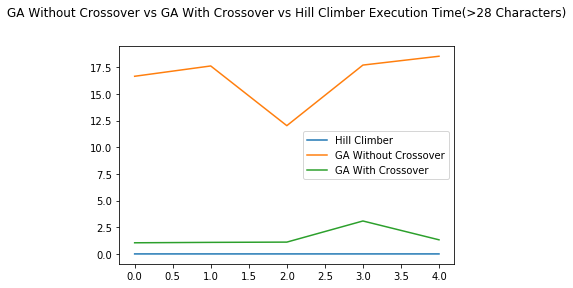

In [28]:
plt.title("GA Without Crossover vs GA With Crossover vs Hill Climber Execution Time"+ 
          "(>28 Characters)", pad = 30)
plt.plot(time_list, label='Hill Climber')
plt.plot(time_list2, label='GA Without Crossover')
plt.plot(time_list3, label='GA With Crossover')
plt.legend()
plt.show()

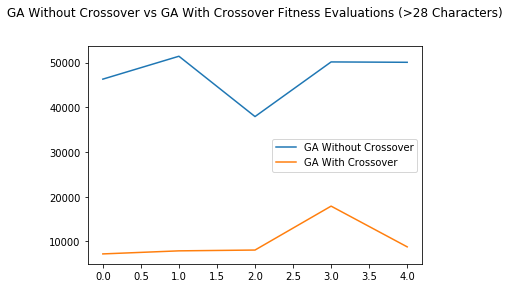

In [29]:
plt.title("GA Without Crossover vs GA With Crossover Fitness Evaluations (>28 Characters)", 
          pad = 30)
plt.plot(fitness_list, label='GA Without Crossover')
plt.plot(fitness_list2, label='GA With Crossover')
plt.legend()
plt.show()

### Higher mutation rate

In [31]:
time_list2, fitness_list = ga_no_cross(pop_num = 500, objective = 'methinks it is like a weasel', rate = 2, iter_num = 3)


Matching String!
Execution Time: 561.7200117111206
methinks it is like a weasel 28
methinks it is like a ieasel 27
metainks it is like a weasel 27
metkinks it is like a weasel 27
methinks if is like a weasel 27
Fitness Evaluation:  48757

Matching String!
Execution Time: 1285.4966530799866
methinks it is like a weasel 28
metdinks it is like a weasel 27
methinks it is like a neasel 27
methinks it is like aqweasel 27
methinks it is like awweasel 27
Fitness Evaluation:  86286

Matching String!
Execution Time: 717.596453666687
methinks it is like a weasel 28
methiyks it is like a weasel 27
methinks it is like a wea el 27
methinks it is like a deasel 27
methimks it is like a weasel 27
Fitness Evaluation:  57101


In [32]:
time_list3, fitness_list2 = ga_cross(pop_num = 500, objective = 'methinks it is like a weasel', rate = 2, iter_num = 3)


Matching String!
Execution Time: 42.472320556640625
methinks it is like a weasel 28
methinks it is likeda weasel 27
methinks it ix like a weasel 27
methinks it is likexa weasel 27
methinks itris like a weasel 27
Fitness Evaluation:  8001

Matching String!
Execution Time: 41.053173780441284
methinks it is like a weasel 28
methink  it is like a weasel 27
methinks it is like anweasel 27
methinks ik is like a weasel 27
methinks it ns like a weasel 27
Fitness Evaluation:  8083

Matching String!
Execution Time: 40.73228716850281
methinks it is like a weasel 28
methinks it is likeda weasel 27
methinks itlis like a weasel 27
methinks it isllike a wewsel 26
mexhinks it is like a wewsel 26
Fitness Evaluation:  8077


In [33]:
time_list = [x/60 for x in time_list]
time_list2 = [x/60 for x in time_list2]
time_list3 = [x/60 for x in time_list3]
print("Hill Climber Execution Time Mean and Variance", np.mean(time_list), np.var(time_list))
print("GA Without Crossover Execution Time Mean and Variance", np.mean(time_list2), np.var(time_list2))
print("GA With Crossover Execution Time Mean and Variance", np.mean(time_list3), np.var(time_list3))

Hill Climber Execution Time Mean and Variance 3.4187463330633847e-07 1.062713365256521e-14
GA Without Crossover Execution Time Mean and Variance 14.248961769209968 26.87224469881446
GA With Crossover Execution Time Mean and Variance 0.6903210083643595 0.00015878586364051535


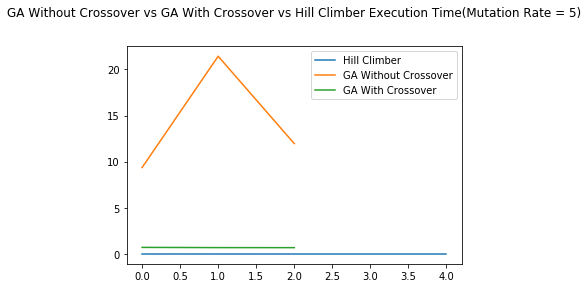

In [34]:
plt.title("GA Without Crossover vs GA With Crossover vs Hill Climber Execution Time"+ 
          "(Mutation Rate = 5)", pad = 30)
plt.plot(time_list, label='Hill Climber')
plt.plot(time_list2, label='GA Without Crossover')
plt.plot(time_list3, label='GA With Crossover')
plt.legend()
plt.show()

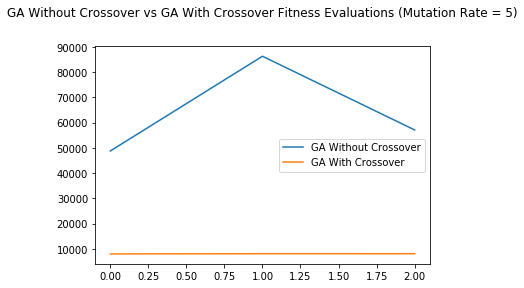

In [35]:
plt.title("GA Without Crossover vs GA With Crossover Fitness Evaluations (Mutation Rate = 5)", 
          pad = 30)
plt.plot(fitness_list, label='GA Without Crossover')
plt.plot(fitness_list2, label='GA With Crossover')
plt.legend()
plt.show()

### Comparing GA No Cross and GA Cross best mutation rates (speed comparison with hill climber)

In [36]:
time_rate1 = []
fitness_rate1 = []
for j in range(1, 6):
    time_list2, fitness_list = ga_no_cross(pop_num = 500, objective = 'methinks it is like a weasel', 
                                           rate = j/2, iter_num = 1)
    time_rate1.append(time_list2)
    fitness_rate1.append(fitness_list)


Matching String!
Execution Time: 385.2545201778412
methinks it is like a weasel 28
methinks it is like amweasel 27
methinks il is like a weasel 27
methinks it is like ahweasel 27
methinks it is like a weayel 27
Fitness Evaluation:  22733

Matching String!
Execution Time: 295.1621401309967
methinks it is like a weasel 28
mehhinks it is like a weasel 27
mezhinks it is like a weasel 27
mewhinks it is like a weasel 27
mebhinks it is like a weasel 27
Fitness Evaluation:  25336

Matching String!
Execution Time: 659.0140135288239
methinks it is like a weasel 28
methinks it ik like a weasel 27
metkinks it is like a weasel 27
methinks it istlike a weasel 27
methinks it ismlike a weasel 27
Fitness Evaluation:  52079

Matching String!
Execution Time: 367.8648405075073
methinks it is like a weasel 28
methinkskit is like a weasel 27
methinkswit is like a weasel 27
methinss it is like a weasel 27
methin s it is like a weasel 27
Fitness Evaluation:  32293

Matching String!
Execution Time: 2644.48452

In [37]:
time_rate2 = []
fitness_rate2 = []
for j in range(1, 6):
    time_list3, fitness_list2 = ga_cross(pop_num = 500, objective = 'methinks it is like a weasel', rate = j/2, 
                                         iter_num = 1)
    time_rate2.append(time_list3)
    fitness_rate2.append(fitness_list2)


Matching String!
Execution Time: 46.86273241043091
methinks it is like a weasel 28
mnthinks it is like a weasel 27
mkthinks it is like a weasel 27
methinksdit is like a weasel 27
methinks it ik like a weasel 27
Fitness Evaluation:  4923

Matching String!
Execution Time: 41.484121322631836
methinks it is like a weasel 28
meehinks it is likl a weasel 26
methinks it is jikl a weasel 26
methincs nt is like a weavel 25
metdiiks it is likeua weasel 25
Fitness Evaluation:  4403

Matching String!
Execution Time: 62.27050161361694
methinks it is like a weasel 28
methinks it is likj a weasel 27
methinks it is like amweasel 27
methinks it is like a weasbl 27
methinks it is like a weadel 27
Fitness Evaluation:  6308

Matching String!
Execution Time: 79.47139143943787
methinks it is like a weasel 28
methinps it is like a weasel 27
methinks it is like a wyasel 27
methinks it iswlike a weasel 27
methinkk it is like a weasel 27
Fitness Evaluation:  7115

Matching String!
Execution Time: 93.0535447597

In [43]:
time_list = [x/60 for x in time_list]
time_rate1 = [x/60 for x in [j for sub in time_rate1 for j in sub]]
time_rate2 = [x/60 for x in [j for sub in time_rate2 for j in sub]]
print("Hill Climber Execution Time Mean and Variance", np.mean(time_list), np.var(time_list))
print("GA Without Crossover Execution Time Mean and Variance", np.mean(time_rate1), np.var(time_rate1))
print("GA With Crossover Execution Time Mean and Variance", np.mean(time_rate2), np.var(time_rate2))

Hill Climber Execution Time Mean and Variance 7.327559870249025e-18 4.882037802683276e-36
GA Without Crossover Execution Time Mean and Variance 14.505933472315471 222.82590301808614
GA With Crossover Execution Time Mean and Variance 1.0771409718195597 0.10472997303701345


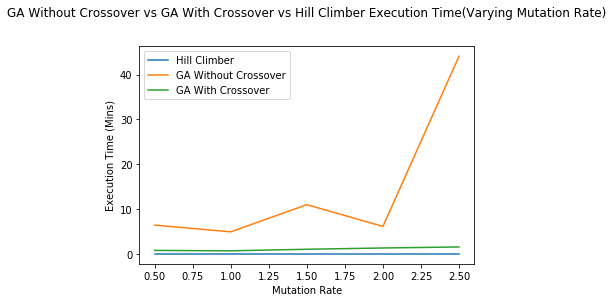

In [55]:
plt.title("GA Without Crossover vs GA With Crossover vs Hill Climber Execution Time"+ 
          "(Varying Mutation Rate)", pad = 30)
plt.plot([1/2, 2/2, 3/2, 4/2, 5/2],time_list, label='Hill Climber')
plt.plot([1/2, 2/2, 3/2, 4/2, 5/2],time_rate1, label='GA Without Crossover')
plt.plot([1/2, 2/2, 3/2, 4/2, 5/2],time_rate2, label='GA With Crossover')
plt.legend()
plt.xlabel("Mutation Rate")
plt.ylabel("Execution Time (Mins)")
plt.show()

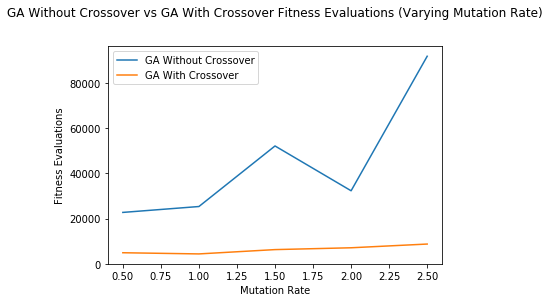

In [54]:
plt.title("GA Without Crossover vs GA With Crossover Fitness Evaluations (Varying Mutation Rate)", 
          pad = 30)
plt.plot([1/2, 2/2, 3/2, 4/2, 5/2], [j for sub in fitness_rate1 for j in sub], label='GA Without Crossover')
plt.plot([1/2, 2/2, 3/2, 4/2, 5/2], [j for sub in fitness_rate2 for j in sub], label='GA With Crossover')
plt.legend()
plt.xlabel("Mutation Rate")
plt.ylabel("Fitness Evaluations")
plt.show()